# Importing Data

In [26]:
import pandas as pd

data = pd.read_csv('Data/Trapped Particle 01 - 2M pts.CSV', skiprows=15)
display(data)

,TIME,CH1
0,-32.00000,-16.0
1,-31.99997,-16.2
2,-31.99994,-16.3
3,-31.99990,-16.5
4,-31.99987,-16.7
...,...,...
1999995,31.99984,-15.6
1999996,31.99987,-15.7
1999997,31.99990,-15.6
1999998,31.99994,-15.6


# Calculating FFT and PSD

In [27]:
import numpy as np

voltages = data['CH1']
voltages = voltages - np.mean(voltages)
dt = data['TIME'].iloc[1] - data['TIME'].iloc[0]
total_timesteps = len(voltages)

# Compute RFFT, PSD and frequency bins, sort the results by PSD
fhat = np.fft.rfft(voltages, total_timesteps)
psd = fhat * np.conj(fhat) / (total_timesteps * dt)
# Adjust the PSD for the symmetry of the RFFT
psd *= 2

# Frequency bins for the RFFT
freqs = np.fft.rfftfreq(total_timesteps, d=dt)

# Verify that PSD is real
assert np.allclose(psd, psd.real)
psd = psd.real

In [28]:
psds = pd.DataFrame({'Frequency': freqs, 'PSD': psd.real})
display(psds)

,Frequency,PSD
0,0.000000,1.437588e-18
1,0.016667,5.258157e+07
2,0.033333,2.938632e+08
3,0.050000,2.864153e+08
4,0.066667,3.607439e+08
...,...,...
999996,16666.600001,7.486404e+00
999997,16666.616667,1.882634e+01
999998,16666.633334,1.400093e+01
999999,16666.650001,1.052210e+02


Text(0.5, 0, 'Frequency (Hz)')

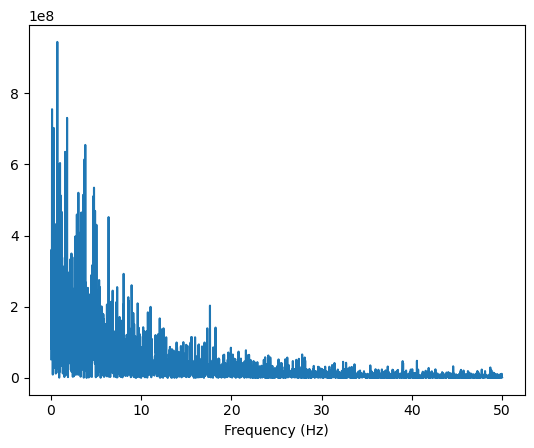

In [29]:
import matplotlib.pyplot as plt

# We only graph PSD for frequencies up to 1 kHz (higher frequencies are noise)
mask = psds['Frequency'] > 0
mask &= psds['Frequency'] < 50
plt.plot(psds['Frequency'][mask], psds['PSD'][mask])
plt.xlabel('Frequency (Hz)')